CMP5367

# Objectives
In this lab you will:
* Revise basic univariate data analysis techniques to better understand how individual variables / attributes are distributed
*	Apply basic bivariate visualisation techniques to better identify the relationships between variables
* Apply Pearson's correlation to investigate the linear relationships that may be present amongst variables / attributes in our datasets
* Define the nominal / categorical encoding technique "one-hot" encoding
* Linear Regression
* Logistic regression







# Library imports



# **Section 1: Linear Regression**

**Don't forget to call the libraries first**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm
from sklearn.model_selection import train_test_split
from statsmodels.graphics.mosaicplot import mosaic
sns.set_style('whitegrid')


In [ ]:
# import importlib
# import matplotlib as mpl
# importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

## Get the Data sets for this lab

Before going any further please make sure you have uploaded the datasets (Adverstising.csv, CarPrice.csv, diabetes.csv, iris.csv) in Colab. You need to first download them from the following link:


* This can be found within the [Lab 4 folder](https://moodle.bcu.ac.uk/course/modedit.php?update=8931503&return=0) on Moodle

## Predicting Sales based on Advertisement methods:

We will first work on a Adervisting.csv data

**Before you start any training or EDA you need to understand your data. What is this [dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv/data) about?**

# Data Pre-processing
When we start building our machine learning models proper, we will be utilising various data [pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) techniques to **clean**, **transform** and **reduce** our data to make it more appropriate for training supervised learning models.

The general process of data pre-processing can be grouped into four parts:
1.   Data Cleaning
  * Handling Missing Data
  * Handling Noisy data
  * Handling Outliers
2.   Data Transformation
  * Encoding
  * Scaling
3.   Data reduction
  * Reducing dimensions of our data
4.   Assess quality of data

For today's lab we will focus on two aspects of this:


*   Identifying missing data for a variable / attribute
*   Encoding nominal variables / attributes for appropriate representation to the ML algorithm



## Description :
The goal of this Task is to use the `sklearn` package to fit a **Linear Regression** on [`advertising.csv`](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8113210) datafile.


## Instructions:
- Use `train_test_split()` function to split the dataset into training and testing sets
- Use the `LinearRegression` function to make a model
- Fit the model on the training set
- Predict on the testing set using the fit model
- Estimate the fit of the model using `mean_squared_error` function
- Plot the dataset along with the predictions to visualize the fit

## Hints:

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression()</a>
LinearRegression fits a linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" target="_blank">mean_squared_error()</a>
Computes the mean squared error regression loss

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">plt.plot()</a>
Plot y versus x as lines and/or markers



In [2]:
# Read the data from the file "Advertising.csv"
df = pd.read_csv('Advertising.csv', index_col=0)

In [3]:
# Take a quick look at the data
df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Get information about your data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Do I need to fill in any missing data?**

Its all on-null no need to fill

**What are my attributes?**
TV, Radio, Newspaper, Sales

In [5]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Simple Linear Regression

**In order to choose a regression model I need to check the relationship between my variables. Are they linear so simple linear regression or they are not and I need another regression model?**

**I can check by a line plot using the pairplot function in seaborn as shown below**

In [8]:
#liberaries needed for training a model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

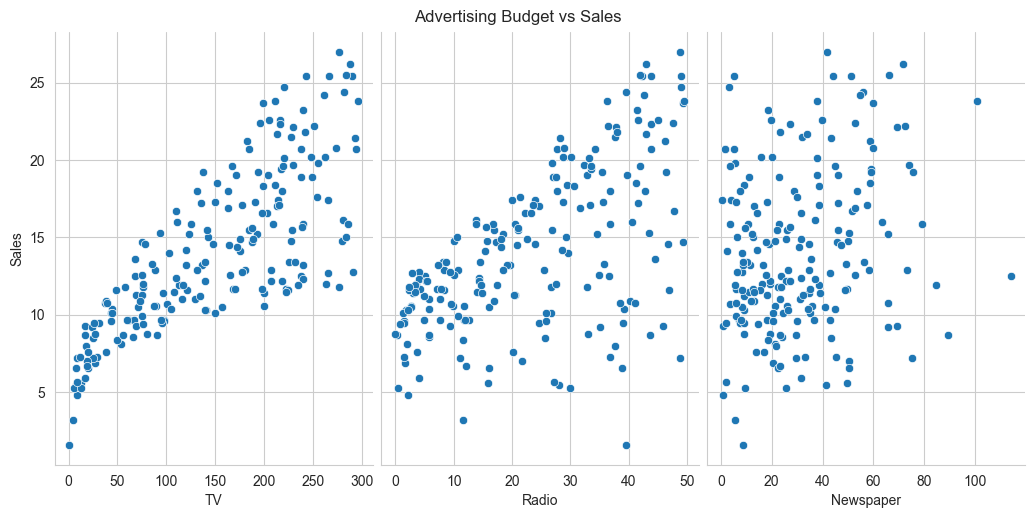

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='scatter')
plt.suptitle('Advertising Budget vs Sales', y=1.02)
plt.show()

**What is the relationship between the sales and each type of advertisement? Anything linear?**

Tv has Strong positive correlation between advertising budget and sales, Radio has medium positive correlation and Newspaper has very low positive correlation. 

Check the relation between TV ads and the Sales:

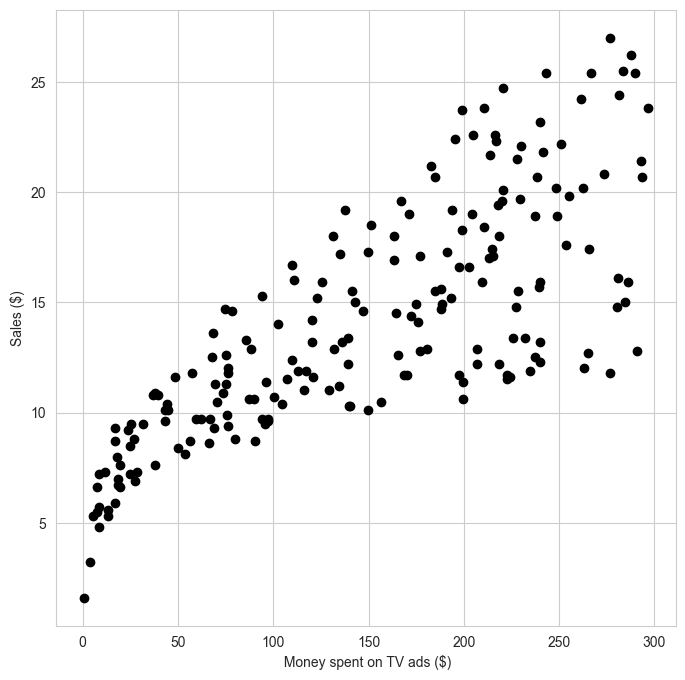

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(df['TV'], df['Sales'], c = 'black')
plt.xlabel(' Money spent on TV ads ($)')
plt.ylabel('Sales ($)')

plt.show()

**In order to train a linear regression (LR) model to predict the sales of a product based on the type of Ad I need to split my data into:**

**1. Training set that eaches the model my data**

**2. Test set on which I will check the perfromance of my model**

In [11]:
# Splitting the data into training and testing sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state=42 (or any fixed number) means every time you run the code, you’ll get the same split.


We will evaluate the model with the following metrics. The first is the most commmon. Refer to the lecture:



1.   MSE is the mean square errors (the less the better)
2.   RMSE  is the root of the mean square errors (the less the better)
3.   R2: R² measures how well your regression model explains the variability of the target variable. ( The more the better)

- R² = 1 → Perfect fit: the model explains 100% of the variance.
- R² = 0 → No explanatory power: the model is no better than predicting the mean.
- R² < 0 → Worse than a horizontal line: the model is actively misleading.





In [12]:
# Initializing the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train) # fit model on the train independent and dependent variables
y_pred = model.predict(X_test) # predict the test set values

# Evaluating the model with the cost function (Mean Square Error MSE refer to lecture) with d
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") #Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE)

print(f"R-squared (R2 Score): {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 3.80
Root Mean Squared Error (RMSE): 1.95
R-squared (R2 Score): 0.86


Interpretation of results (Sales in Thousands of Dollars)

| Metric | Value | What It Means |
|--------|-------|----------------|
| **Mean Squared Error (MSE)** | 3.80 | On average, the squared error between predicted and actual sales is **3.80 thousand dollars²**.
| **Root Mean Squared Error (RMSE)** | 1.95 | Your model’s predictions are typically off by **about $1,950**. This is the average error in real dollar terms. |
| **R-squared (R² Score)** | 0.86 | The model explains **86% of the variation in sales**, based on advertisement type. That’s a strong fit. |

---


**We can train other types of regression models by changing the name of the model in SKLEARN**

In [13]:
# Initialize and train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2 Score): {r2_dt:.2f}")



Decision Tree Regressor Evaluation Metrics:
Mean Squared Error (MSE): 1.55
Root Mean Squared Error (RMSE): 1.25
R-squared (R2 Score): 0.94


In [14]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")


Random Forest Regressor Evaluation Metrics:
Mean Squared Error (MSE): 0.46
Root Mean Squared Error (RMSE): 0.68
R-squared (R2 Score): 0.98


**Explain here the results of the best model:**

The random forest model seems to be best in this instance. it sccounts for 98% of the data variation incredibly strong fit. Only 0.46^2 thousand dollars margin of error between predicted and actual. Model variations are off by about $680 compared to the other 2 this is a very small average error in real costs.

**We can also draw the best fit model**

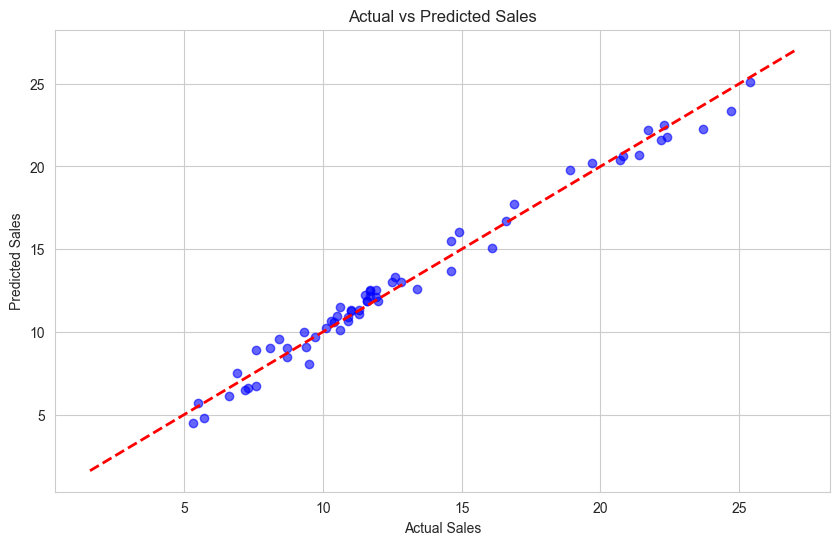

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [16]:
model.intercept_

np.float64(2.7089490925159065)

**These are the model's coefficients (the slope and intercept of the best fit line)**

In [17]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

### Additional Challenges

Please redo the same experiment on the CarPrice.csv data to predict the car price.

In [1]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [25]:
# load data to a dataframe
df = pd.read_csv('CarPrice.csv')

In [3]:
# check the shape
df.shape

(205, 26)

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# check unique data for each feature in the data frame
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [26]:
# columns names of the dataframe
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Now, we can prepare the data for the linear regression model. For this experiment we will predict the price only on the enginsize

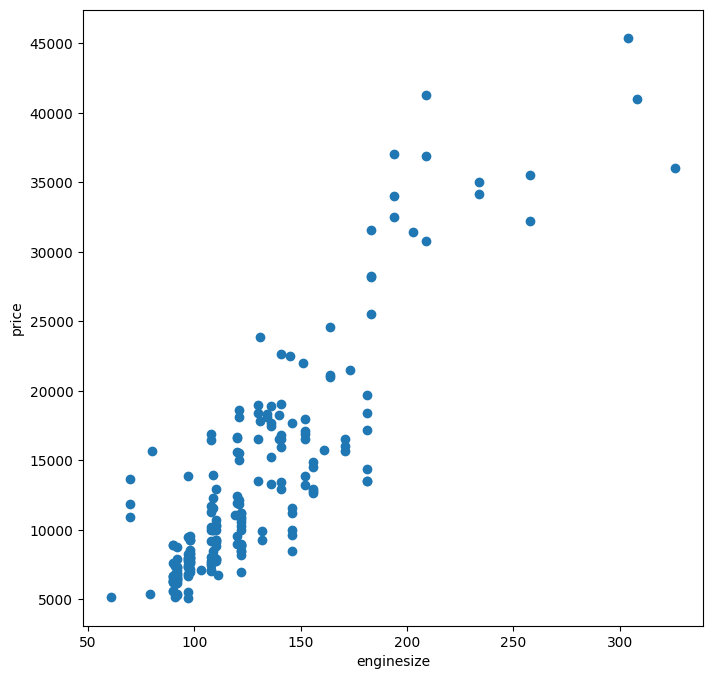

In [8]:
# check the distribution of data by plotting a scatter
plt.figure(figsize = (8, 8))
plt.scatter(x = df['enginesize'], y = df['price'])
plt.xlabel('enginesize')
plt.ylabel('price')

plt.show()


In [9]:
# define X and y
X = df['enginesize']
y = df['price']

In [10]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,
                                                    random_state=42)

In [12]:
# Shapes of splitted data - sizes of the X_train and y_train should be same. Also test.
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (164,)
X_test:  (41,)
y_train:  (164,)
y_test:  (41,)


In [13]:
# create a linear regression model
clf = LinearRegression()

In [14]:
# train the model using training data
# since we have only one independent variable, we should use 'values.reshpae(-1,1)
X_train = X_train.values.reshape(-1, 1)

In [15]:
clf.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# print coefficient
clf.coef_

array([165.84456256])

In [17]:
# print y_intercept | bias
clf.intercept_

np.float64(-7741.765067166594)

In [18]:
# make predictions using test data
y_pred = clf.predict(X_test.values.reshape(-1, 1))

In [19]:
# Let's calculate the metrics
# Means Squared Error (MSE)
mse = mean_squared_error(y_pred, y_test)
print("MSE ----> ", mse)

MSE ---->  15465458.96590847


In [20]:
# Root Mean Squared Error (RMSE)
import math
rmse = math.sqrt(mse)
print('RMSE ----- > ', rmse)

RMSE ----- >  3932.614774664367


In [21]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_pred, y_test)
print('MAE == > ', mae)

MAE == >  2748.6947032901094


In [22]:
# R squared (R2)
r2 = r2_score(y_pred, y_test)
print('R2 ----> ', r2)

R2 ---->  0.7338146014506945


In [23]:
# print them all
print("MSE ----> ", mse)
print('RMSE ----- > ', rmse)
print('MAE == > ', mae)
print('R2 ----> ', r2)

MSE ---->  15465458.96590847
RMSE ----- >  3932.614774664367
MAE == >  2748.6947032901094
R2 ---->  0.7338146014506945


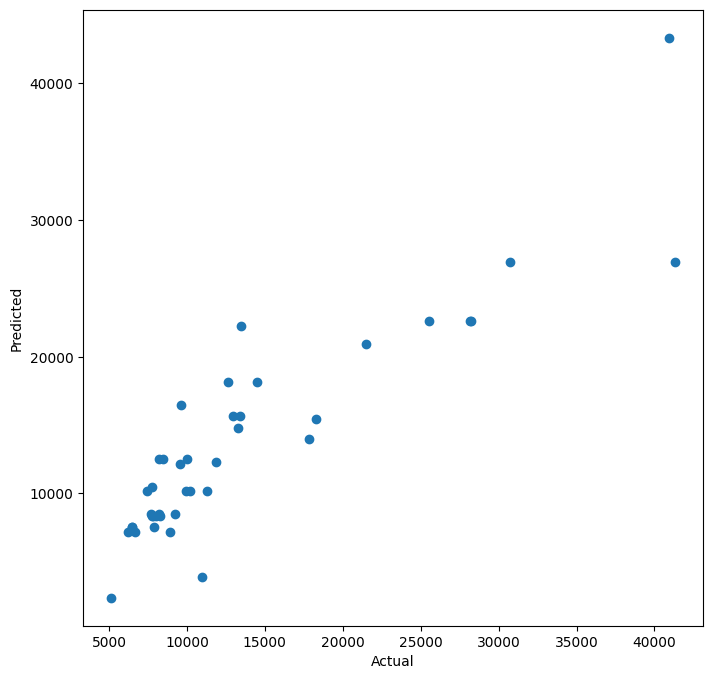

In [24]:
# plot actual and predicted values
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='price'>

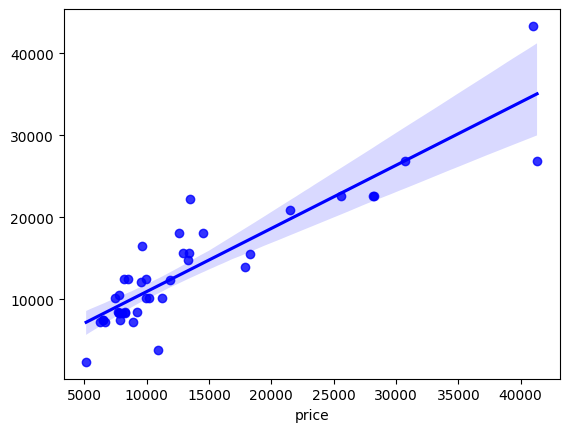

In [25]:
# plot regression model line
sns.regplot(x = y_test, y = y_pred, color= 'blue')

**Explain the results here:**
This shows a regression model of the predicted prices vs the actual prices in the data. The X axis is the actual and the Y is the predicted. There is a positive line but the data points show that while the engine size does equal value in a general sense its not indicitive of the price of the vehical. 

# Logistic Regression
Dataset is [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**What is the dataset about?**
**Pregnancies**: Number of pregnancies

**Glucose**: Glucose level

**BloodPressure**: Blood pressure level

**SkinThickness**: Skin thickness measurement

**Insulin**: Insulin level

**BMI**: Body Mass Index

**DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history

**Age**: Age of the patient

**Outcome**: Whether the patient has diabetes (1) or not (0)

In [10]:
#import pandas
import pandas as pd

# load dataset
pima = pd.read_csv("diabetes.csv")

In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
len(pima)

768

In [13]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','BloodPressure','SkinThickness','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

We split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly. The Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression()) # a function that combines dataprocessing, here scaling, and model
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [17]:
# import the metrics class
from sklearn import metrics
y_pred = pipe.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14,  1],
       [ 0, 10]])

**This confusion matrix will be explained in later lectures but for now just check how far the model is able to predict whether the patient is positive or negative diabetic**

Text(0.5, 427.9555555555555, 'Predicted label')

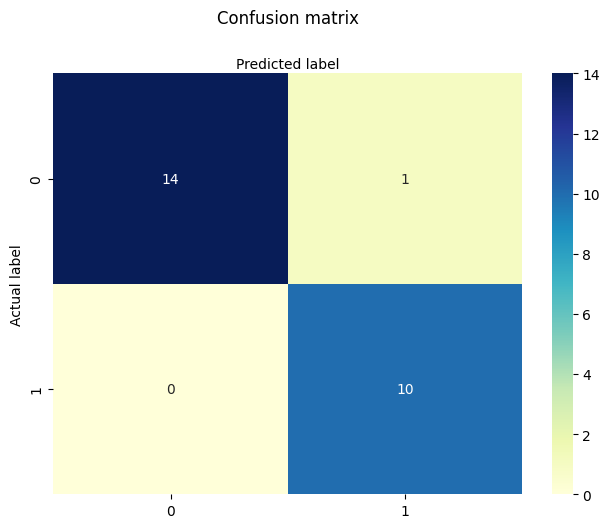

In [18]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



**Check the F1 score (the more the better)**

In [19]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       1.00      0.93      0.97        15
   with diabetes       0.91      1.00      0.95        10

        accuracy                           0.96        25
       macro avg       0.95      0.97      0.96        25
    weighted avg       0.96      0.96      0.96        25



In [20]:
pipe.classes_

array([0, 1])

In [22]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**I will train here a logistic regression on Glucose and BMI values. All the code together**

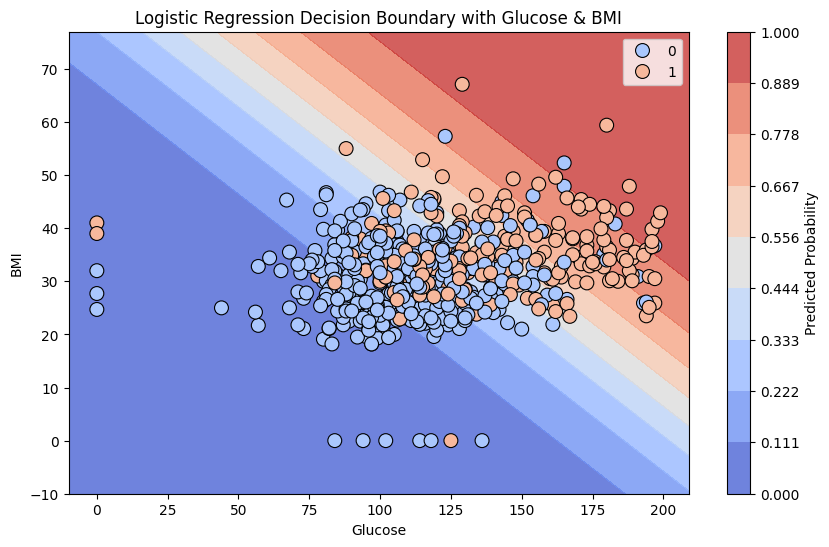

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features: Glucose and BMI, and the target (Outcome)
X = pima[['Glucose', 'BMI']].values
y = pima['Outcome'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate a mesh grid for visualization
x_min, x_max = X_train[:, 0].min() - 10, X_train[:, 0].max() + 10
y_min, y_max = X_train[:, 1].min() - 10, X_train[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the probabilities for the mesh grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability of Outcome = 1
Z = Z.reshape(xx.shape)

# Plot the logistic regression decision boundary and the logistic function
plt.figure(figsize=(10, 6))

# Plot the decision boundary with predicted probabilities
contour = plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 10), cmap='coolwarm')

# Add a color bar to show the probability values
plt.colorbar(contour, label="Predicted Probability")

# Plot the original data points
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='coolwarm', edgecolor='k', s=100)

# Label the plot
plt.title("Logistic Regression Decision Boundary with Glucose & BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")

# Show the plot
plt.show()





The plot above shows the logistic regression decision boundary for predicting diabetes based on Glucose and BMI features. The contour map represents the predicted probability of having diabetes (Outcome = 1), where the color intensity increases with higher probabilities. The scatter points represent the actual data points, with different colors for each class (diabetic or non-diabetic).

The boundary between the two regions indicates where the model classifies data points as diabetic or non-diabetic based on these two features.

**<mark>Homework</mark>:** Can you try with another two features? Which ones will you choose (hint:

1.   Train a linear regression for the car dataset on other variables besides the engine size.
2.   Train a logistic regression for the diabetes on two other variables in the diabetes dataset.



## Multi-Variable Linear Regression for Car Price Prediction

In [28]:
# Load necessary libraries for the multi-variable regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the car dataset
df_car = pd.read_csv('CarPrice.csv')

# Display basic information about the dataset
print("Dataset Shape:", df_car.shape)
print("\nFirst 5 rows:")
print(df_car.head())
print("\nColumn names:")
print(df_car.columns.tolist())

Dataset Shape: (205, 26)

First 5 rows:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compres

In [29]:
# Select numerical features for multi-variable linear regression
# We'll use multiple features that are likely to influence car price
numerical_features = ['enginesize', 'horsepower', 'curbweight', 'citympg', 
                     'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight']

# Create feature matrix X and target variable y
X_multi = df_car[numerical_features]
y_multi = df_car['price']

print("Features selected for multi-variable regression:")
print(numerical_features)
print(f"\nFeature matrix shape: {X_multi.shape}")
print(f"Target variable shape: {y_multi.shape}")

# Display basic statistics of the features
print("\nBasic statistics of the features:")
print(X_multi.describe())

Features selected for multi-variable regression:
['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight']

Feature matrix shape: (205, 9)
Target variable shape: (205,)

Basic statistics of the features:
       enginesize  horsepower   curbweight     citympg  highwaympg  \
count  205.000000  205.000000   205.000000  205.000000  205.000000   
mean   126.907317  104.117073  2555.565854   25.219512   30.751220   
std     41.642693   39.544167   520.680204    6.542142    6.886443   
min     61.000000   48.000000  1488.000000   13.000000   16.000000   
25%     97.000000   70.000000  2145.000000   19.000000   25.000000   
50%    120.000000   95.000000  2414.000000   24.000000   30.000000   
75%    141.000000  116.000000  2935.000000   30.000000   34.000000   
max    326.000000  288.000000  4066.000000   49.000000   54.000000   

        wheelbase   carlength    carwidth   carheight  
count  205.000000  205.000000  205.000000  205.0

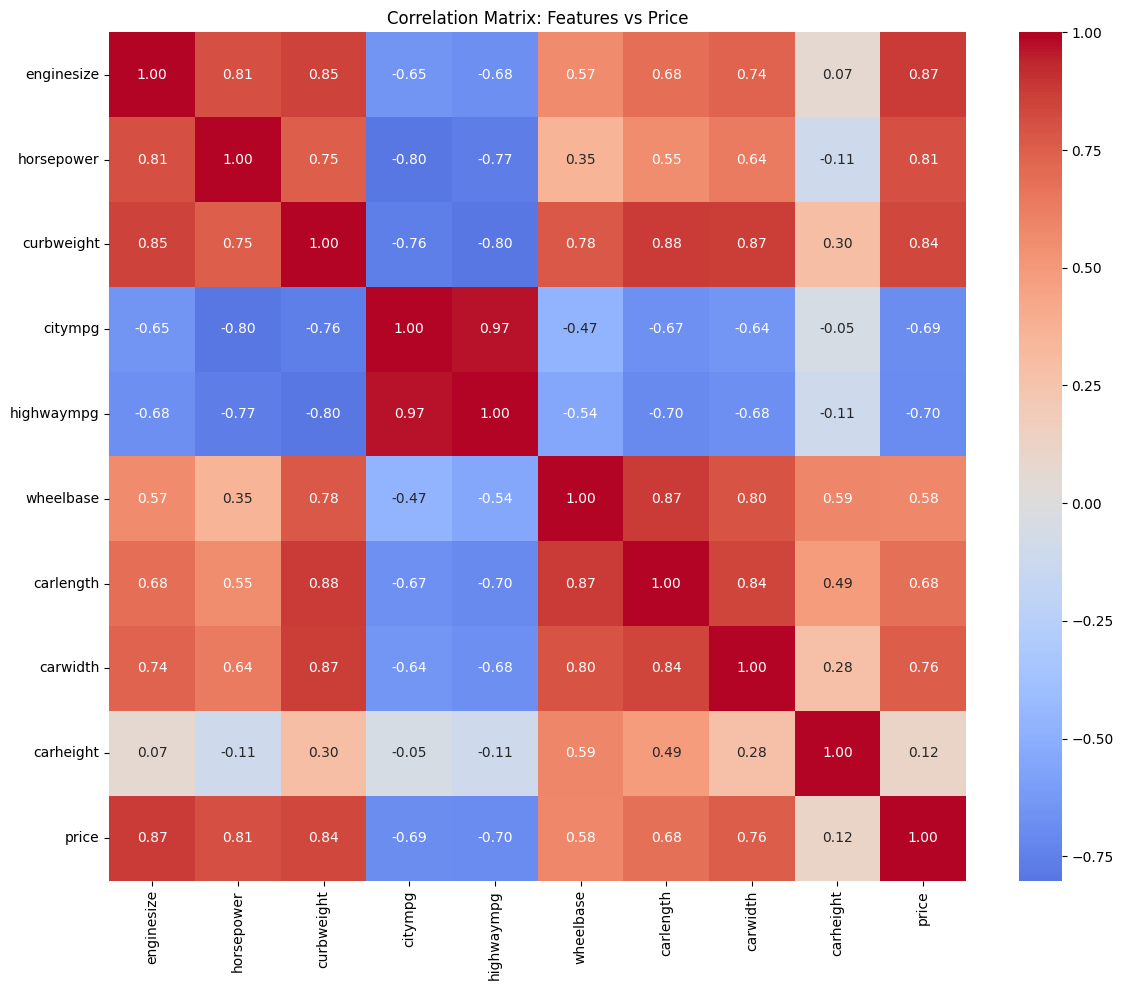

Correlation of features with price (sorted by absolute value):
price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
highwaympg   -0.697599
citympg      -0.685751
carlength     0.682920
wheelbase     0.577816
carheight     0.119336
Name: price, dtype: float64


In [ ]:
# Correlation matrix to understand relationships between features and price
plt.figure(figsize=(12, 10))
correlation_matrix = df_car[numerical_features + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix: Features vs Price')
plt.tight_layout()
plt.show()

# Display correlations with price specifically
price_correlations = correlation_matrix['price'].sort_values(key=abs, ascending=False)
print("Correlation of features with price (sorted by absolute value):")
print(price_correlations)

In [31]:
# Split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

print(f"Training set shape: X_train {X_train_multi.shape}, y_train {y_train_multi.shape}")
print(f"Testing set shape: X_test {X_test_multi.shape}, y_test {y_test_multi.shape}")

# Optional: Scale the features for better performance (though not strictly necessary for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

print("\nFeatures have been scaled using StandardScaler")

Training set shape: X_train (164, 9), y_train (164,)
Testing set shape: X_test (41, 9), y_test (41,)

Features have been scaled using StandardScaler


In [32]:
# Train the multi-variable linear regression model
# We'll train both scaled and unscaled versions for comparison

# Model 1: Using original (unscaled) features
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)

# Model 2: Using scaled features
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_multi)
y_pred_scaled = model_scaled.predict(X_test_scaled)

print("Multi-variable Linear Regression Models Trained Successfully!")

Multi-variable Linear Regression Models Trained Successfully!


In [33]:
# Evaluate both models
# Model 1: Unscaled features
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Model 2: Scaled features (should give same results)
mse_scaled = mean_squared_error(y_test_multi, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_multi, y_pred_scaled)

print("=" * 60)
print("MULTI-VARIABLE LINEAR REGRESSION RESULTS")
print("=" * 60)
print("\nModel 1 (Original Features):")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_multi:.2f}")
print(f"R-squared (R² Score): {r2_multi:.4f}")

print("\nModel 2 (Scaled Features):")
print(f"Mean Squared Error (MSE): {mse_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_scaled:.2f}")
print(f"R-squared (R² Score): {r2_scaled:.4f}")

print(f"\nModel Performance:")
print(f"• The model explains {r2_multi:.1%} of the variation in car prices")
print(f"• Average prediction error: ${rmse_multi:.2f}")
print(f"• Both models perform identically (scaling doesn't affect linear regression results)")

MULTI-VARIABLE LINEAR REGRESSION RESULTS

Model 1 (Original Features):
Mean Squared Error (MSE): 14317129.27
Root Mean Squared Error (RMSE): $3783.80
R-squared (R² Score): 0.8186

Model 2 (Scaled Features):
Mean Squared Error (MSE): 14317129.27
Root Mean Squared Error (RMSE): $3783.80
R-squared (R² Score): 0.8186

Model Performance:
• The model explains 81.9% of the variation in car prices
• Average prediction error: $3783.80
• Both models perform identically (scaling doesn't affect linear regression results)


In [34]:
# Compare with the single-variable model (engine size only)
# First, let's recreate the single-variable model for comparison
X_single = df_car[['enginesize']]
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y_multi, test_size=0.2, random_state=42
)

model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)
y_pred_single = model_single.predict(X_test_single)

mse_single = mean_squared_error(y_test_single, y_pred_single)
rmse_single = np.sqrt(mse_single)
r2_single = r2_score(y_test_single, y_pred_single)

print("=" * 60)
print("COMPARISON: SINGLE vs MULTI-VARIABLE MODELS")
print("=" * 60)
print("\nSingle Variable Model (Engine Size Only):")
print(f"Mean Squared Error (MSE): {mse_single:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_single:.2f}")
print(f"R-squared (R² Score): {r2_single:.4f}")

print("\nMulti-Variable Model (9 Features):")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_multi:.2f}")
print(f"R-squared (R² Score): {r2_multi:.4f}")

print(f"\nImprovement with Multi-Variable Model:")
print(f"• R² Score improved by: {((r2_multi - r2_single)/r2_single)*100:.1f}%")
print(f"• RMSE reduced by: ${rmse_single - rmse_multi:.2f}")
print(f"• MSE reduced by: {mse_single - mse_multi:.2f}")

COMPARISON: SINGLE vs MULTI-VARIABLE MODELS

Single Variable Model (Engine Size Only):
Mean Squared Error (MSE): 15465458.97
Root Mean Squared Error (RMSE): $3932.61
R-squared (R² Score): 0.8041

Multi-Variable Model (9 Features):
Mean Squared Error (MSE): 14317129.27
Root Mean Squared Error (RMSE): $3783.80
R-squared (R² Score): 0.8186

Improvement with Multi-Variable Model:
• R² Score improved by: 1.8%
• RMSE reduced by: $148.82
• MSE reduced by: 1148329.69


FEATURE IMPORTANCE ANALYSIS

Feature Coefficients (sorted by absolute value):
      Feature  Coefficient  Abs_Coefficient
7    carwidth   720.266954       720.266954
8   carheight   217.843343       217.843343
3     citympg  -162.802803       162.802803
0  enginesize    85.701471        85.701471
4  highwaympg    78.923517        78.923517
6   carlength   -62.265098        62.265098
1  horsepower    46.863545        46.863545
2  curbweight     1.923246         1.923246
5   wheelbase     1.100983         1.100983

Model Intercept: -54214.92


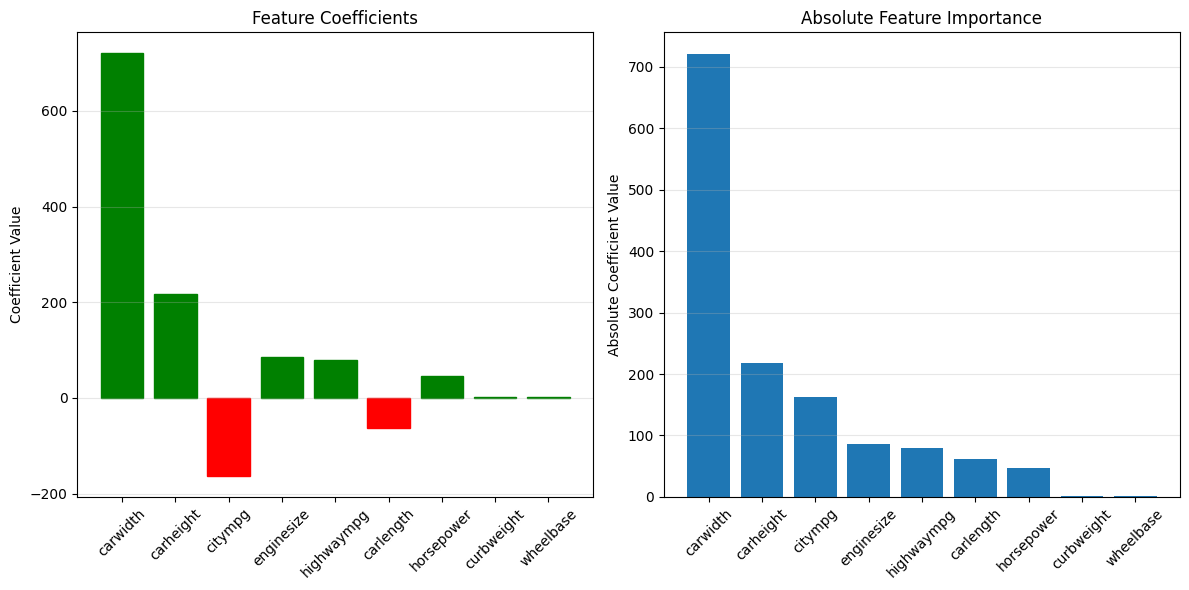

In [35]:
# Analyze feature importance through coefficients
feature_importance = pd.DataFrame({
    'Feature': numerical_features,
    'Coefficient': model_multi.coef_,
    'Abs_Coefficient': np.abs(model_multi.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)
print("\nFeature Coefficients (sorted by absolute value):")
print(feature_importance)

print(f"\nModel Intercept: {model_multi.intercept_:.2f}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(range(len(feature_importance)), feature_importance['Coefficient'])
plt.xticks(range(len(feature_importance)), feature_importance['Feature'], rotation=45)
plt.title('Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', alpha=0.3)

# Color bars based on positive/negative coefficients
for i, bar in enumerate(bars):
    if feature_importance.iloc[i]['Coefficient'] > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.subplot(1, 2, 2)
plt.bar(range(len(feature_importance)), feature_importance['Abs_Coefficient'])
plt.xticks(range(len(feature_importance)), feature_importance['Feature'], rotation=45)
plt.title('Absolute Feature Importance')
plt.ylabel('Absolute Coefficient Value')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

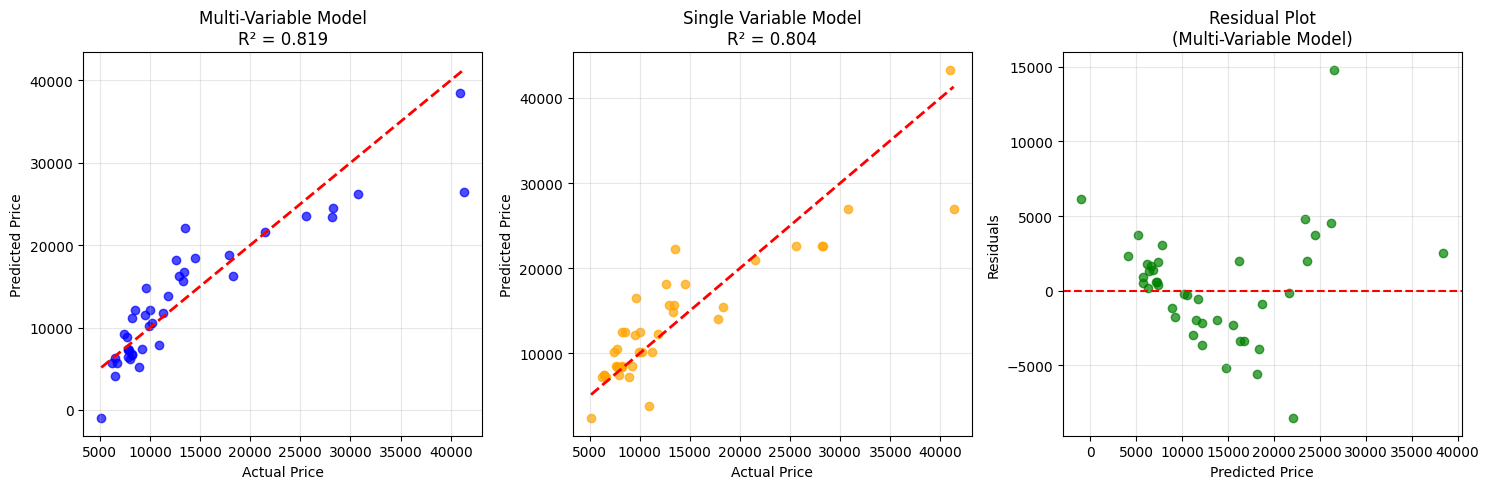

In [36]:
# Visualize model performance
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted (Multi-variable model)
plt.subplot(1, 3, 1)
plt.scatter(y_test_multi, y_pred_multi, alpha=0.7, color='blue')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Multi-Variable Model\nR² = {r2_multi:.3f}')
plt.grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (Single-variable model)
plt.subplot(1, 3, 2)
plt.scatter(y_test_single, y_pred_single, alpha=0.7, color='orange')
plt.plot([y_test_single.min(), y_test_single.max()], [y_test_single.min(), y_test_single.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Single Variable Model\nR² = {r2_single:.3f}')
plt.grid(True, alpha=0.3)

# Plot 3: Residual plot for multi-variable model
plt.subplot(1, 3, 3)
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot\n(Multi-Variable Model)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()